## Answer 1

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, LabelEncoder


from colorama import Fore, Back, Style


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("laptops.csv")

In [5]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [6]:
print("The Shape is: " + Fore.GREEN + str(df.shape) + Style.RESET_ALL)

The Shape is: (1273, 13)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [8]:
df.isnull().sum()


Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

No Null Values 😊

In [9]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [12]:
df.drop('Company', axis=1, inplace=True)

## Answer 2

1 .Calculate the correlation coefficient between each attribute and the target variable (laptop price) in the correlation analysis method. Generally speaking, features with greater absolute correlation coefficients—both positive and negative—are more significant.
Why: By using this strategy, one can find linear correlations between the target and characteristics. Strong correlations between features—whether positive or negative—are probably significant predictors of the target variable.


2. Feature Importance from Trees: Technique: Apply ensemble techniques like Gradient Boosting Machines or Random Forests, which can yield feature importance scores according to the degree to which each feature lowers impurity in decision trees.
Why: Non-linear correlations and interactions between characteristics can be effectively identified with these methods. Higher relevance feature scores indicate that the feature is probably more relevant for target variable prediction.



## Answer 3

In [15]:
# Extract relevant features
df['ScreenSize'] = df['Ppi'] * df['Weight']
df['StorageCapacity'] = df['HDD'] + df['SSD']

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['TypeName', 'TouchScreen', 'Cpu_brand', 'Gpu_brand', 'Os'])


In [16]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [40]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)

## Decision Tree Regression

In [41]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, dt_pred)


## Random Forest Regression:

In [42]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_pred)


## Model Performance Comparison: Comparing regression model performances

In [43]:

print("Linear Regression MSE:" + Fore.CYAN + str(mse_lr) + Style.RESET_ALL)
print("Decision Tree Regression MSE:" + Fore.RED + str(mse_dt) + Style.RESET_ALL)
print("Random Forest Regression MSE:" + Fore.GREEN + str(mse_rf) + Style.RESET_ALL)


Linear Regression MSE:116401.2492205776
Decision Tree Regression MSE:120285.62128838888
Random Forest Regression MSE:117720.50894189783


# **📊 Graph of Models Performance**

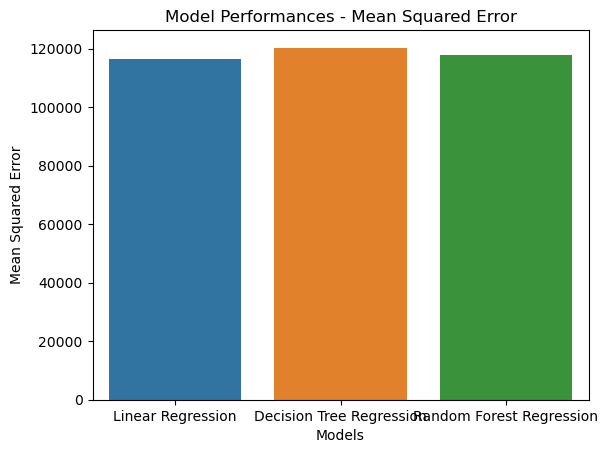

(None,)

In [44]:

# Create a bar graph for model performances
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_scores = [mse_lr, mse_dt, mse_rf]

sns.barplot(x=models, y=mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performances - Mean Squared Error')

plt.show(),
              


## Answer 3

## Final model

In [51]:
model_info = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor'],
    
    'MSE': [mse_lr,  mse_rf, mse_dt],
}      

performance = pd.DataFrame(model_info)
performance

,Model,MSE
0,Linear Regression,116401.249221
1,Random Forest Regressor,117720.508942
2,Decision Tree Regressor,120285.621288


In [52]:
performance[performance['MSE'] == performance['MSE'].max()]

,Model,MSE
2,Decision Tree Regressor,120285.621288


In [54]:
import joblib

joblib.dump(model_info, 'laptop_price_prediction_model.pkl')

['laptop_price_prediction_model.pkl']

## Answer 5

In [ ]:
import joblib

loaded_model = joblib.load('laptop_price_prediction_model.pkl')
def predict_laptop_price(brand, processor, ram, storage, gpu):
    # Example: Construct a DataFrame with the input features
   new_data = {
        'Brand': [brand],
        'Processor': [processor],
        'RAM': [ram],
        'Storage': [storage],
        'GPU': [gpu]
    }
    
    
    
predicted_price = loaded_model.predict(new_data)  
    
return predicted_price[0] 

:
predicted_price = predict_laptop_price('Dell', 'Intel i5', '8GB', '512GB SSD', 'Nvidia GTX 1650')
print(f"Predicted price: ${predicted_price:.2f}")